##### NASA 데이터 EDA
- 전체, 정상, 이상 각 그룹마다 데이터 상황 보고
- 추후 cGAN을 이용해 Upsampling한 데이터와 비교하고자 함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# fname 옵션을 사용하는 방법
path = '/Library/Fonts/NanumBarunpenRegular.otf'
fontprop = fm.FontProperties(fname=path, size=18)

In [3]:
nasa_train = pd.read_csv('C:/Users/ARA/Desktop/금형/python/data/train_failure10_4.csv',encoding= 'cp949', engine='python')
nasa_test = pd.read_csv('C:/Users/ARA/Desktop/금형/python/data/train_failure10_4.csv',encoding= 'cp949', engine='python')
nasa = pd.concat([nasa_train,nasa_test], axis = 0)
nasa = nasa_train

In [4]:
normal = 0
abnormal = 1

In [5]:
col_name = nasa.columns
col_name = col_name[2:-1]
col_len = len(col_name)

In [6]:
# uniqu value check
for col in col_name:
    value = nasa[col].unique()
    if len(value) == 1:
        pass
#         print('{} 은 유일한 값 {}을 가지는 변수 입니다.'.format(col,value))
    else:
#         pass
        print('{}은 {} 종류의 값을 가지는 변수입니다.'.format(col,len(value)))
    

2은 536 종류의 값을 가지는 변수입니다.
3은 105 종류의 값을 가지는 변수입니다.
4은 2 종류의 값을 가지는 변수입니다.
5은 6 종류의 값을 가지는 변수입니다.
6은 1682 종류의 값을 가지는 변수입니다.
7은 12963 종류의 값을 가지는 변수입니다.
8은 16269 종류의 값을 가지는 변수입니다.
9은 6 종류의 값을 가지는 변수입니다.
10은 46 종류의 값을 가지는 변수입니다.
11은 5718 종류의 값을 가지는 변수입니다.
12은 1007 종류의 값을 가지는 변수입니다.
13은 23244 종류의 값을 가지는 변수입니다.
14은 21 종류의 값을 가지는 변수입니다.
15은 731 종류의 값을 가지는 변수입니다.
16은 5434 종류의 값을 가지는 변수입니다.
17은 469 종류의 값을 가지는 변수입니다.
18은 15056 종류의 값을 가지는 변수입니다.
19은 11383 종류의 값을 가지는 변수입니다.
20은 2 종류의 값을 가지는 변수입니다.
21은 54 종류의 값을 가지는 변수입니다.
22은 6 종류의 값을 가지는 변수입니다.
23은 2 종류의 값을 가지는 변수입니다.
24은 643 종류의 값을 가지는 변수입니다.
25은 19981 종류의 값을 가지는 변수입니다.


##### 그룹별 보기

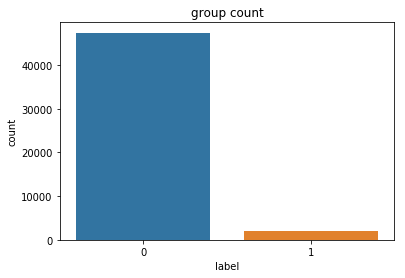

In [7]:
import seaborn as sns

# group(전체, 정상, 이상) count
sns.countplot(x="label", data=nasa)
plt.title("group count")
plt.show()

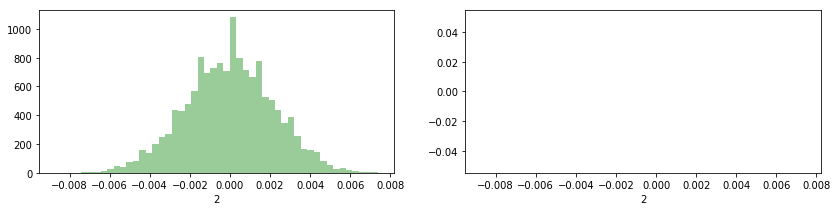

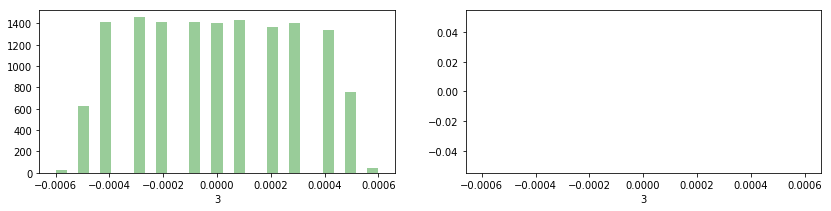

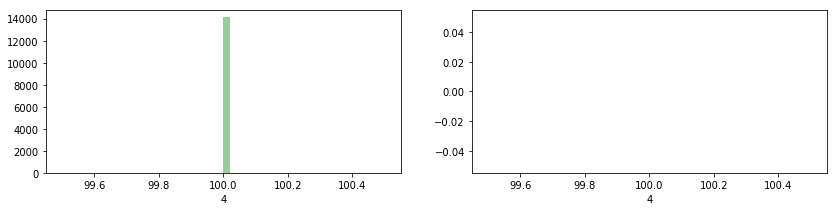

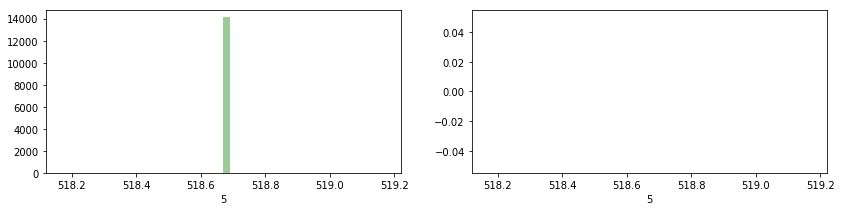

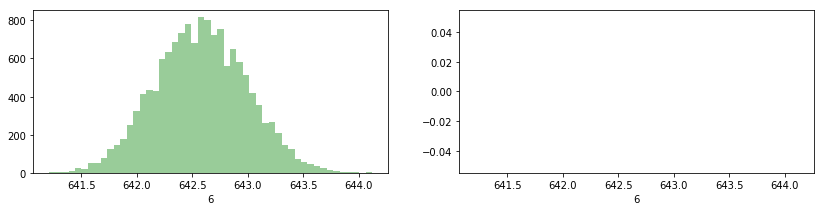

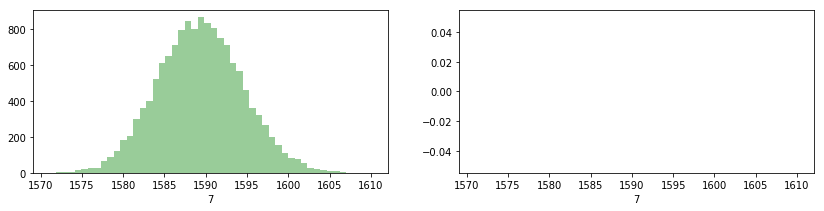

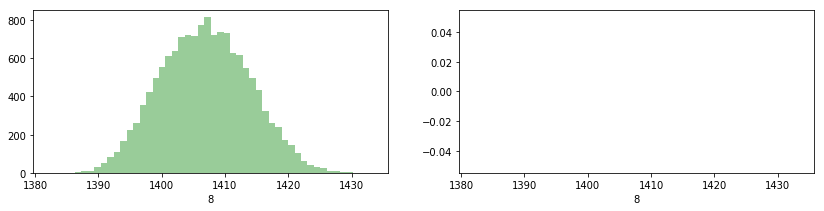

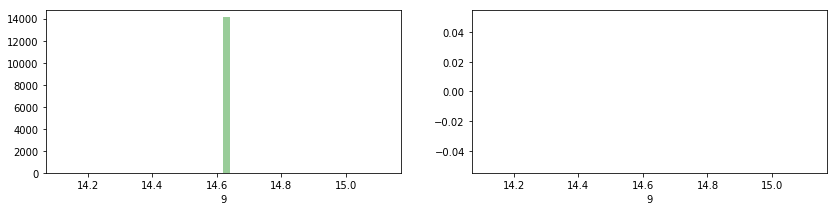

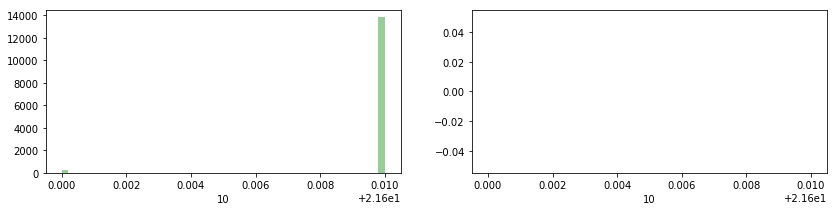

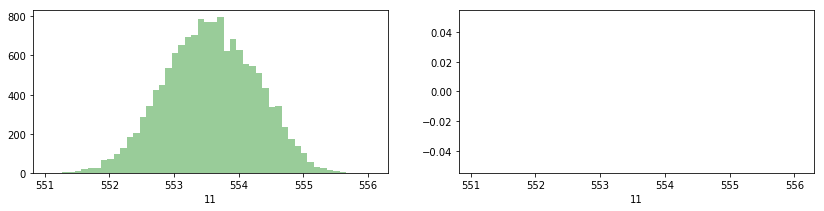

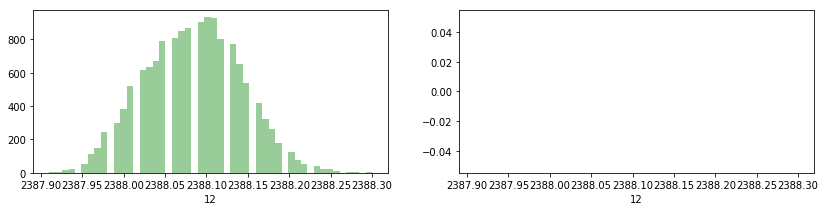

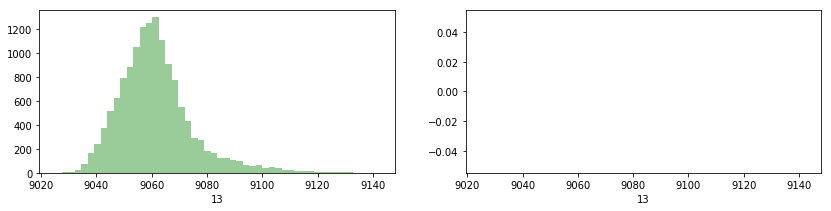

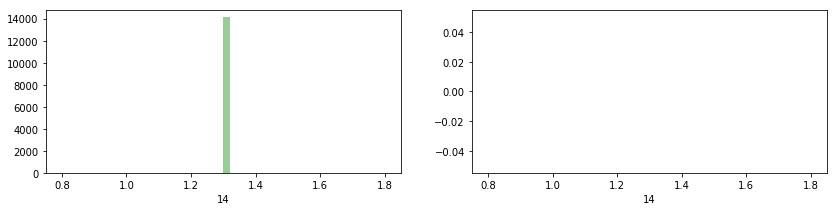

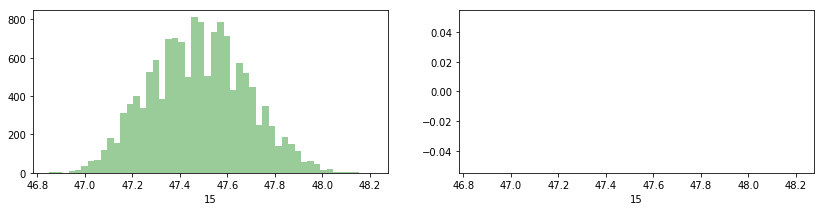

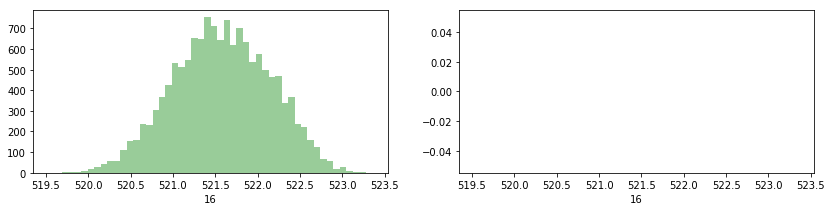

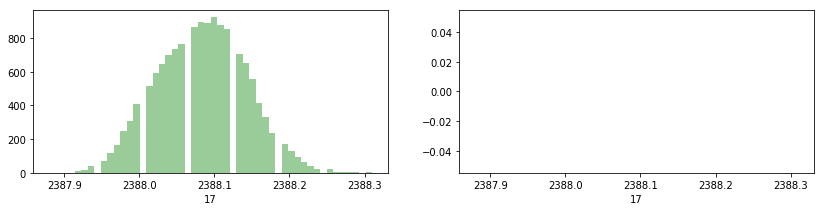

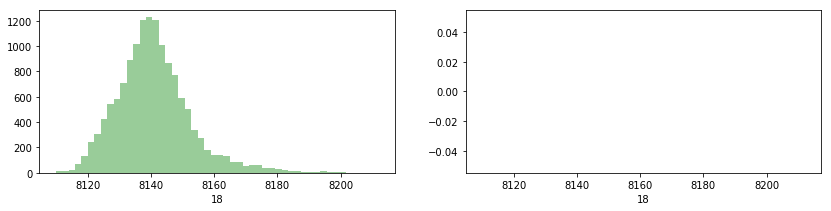

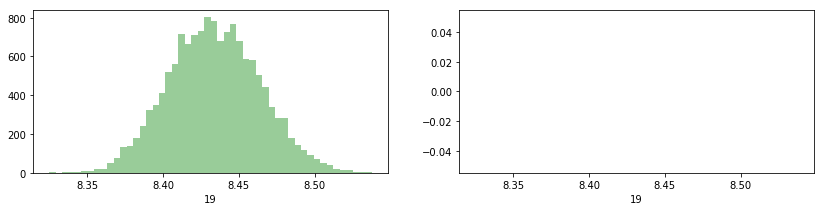

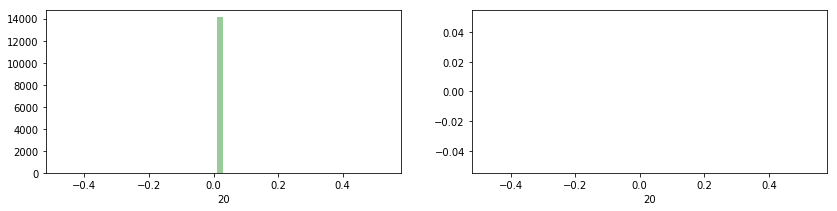

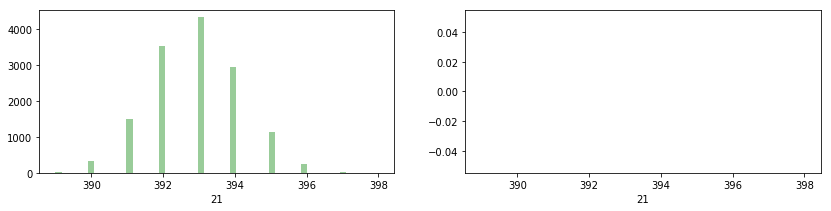

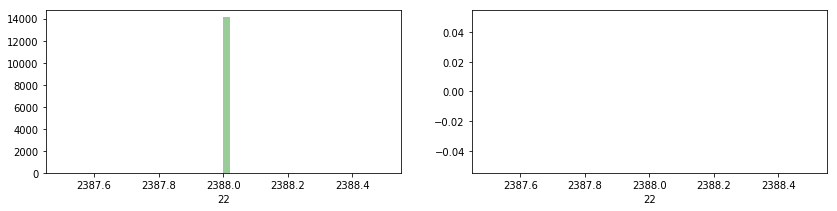

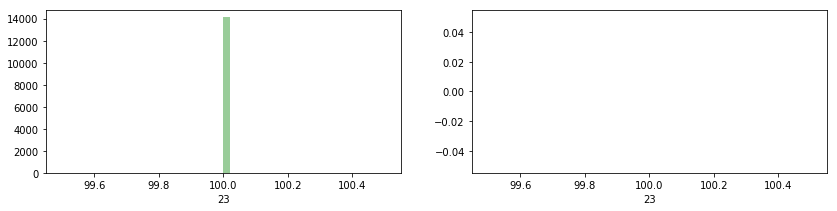

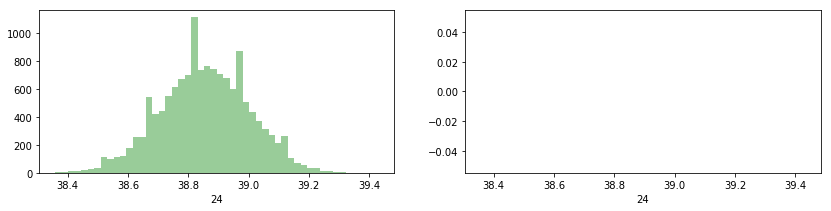

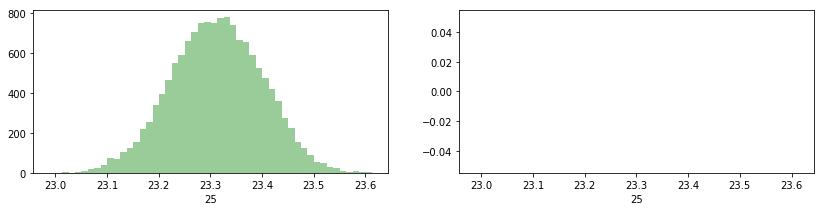

In [12]:
# 전체
nomal = nasa[nasa.label == normal]
fail = nasa[nasa.label == abnormal]

# figure, axes = plt.subplots(col_len, 2, figsize=(14, 80))
for i in range(0,col_len):
    figure, axes = plt.subplots(1, 2, figsize=(14, 3))
    nomal_sub = nomal[col_name[i]]
    fail_sub = fail[col_name[i]]
    sns.distplot(nomal_sub,color = 'g',ax=axes[0], kde = False, norm_hist = False)
    sns.distplot(fail_sub,color = 'r',ax=axes[1], kde = False, norm_hist = False)

    hist_min = axes[0].get_xlim()[0]
    hist_max = axes[0].get_xlim()[1]
    axes[1].set_xlim(hist_min,hist_max)  
    
    plt.show()
#     figure.savefig('./result/nasa_EDA2/all_FD001_failure5_'+str(i)+'.png')

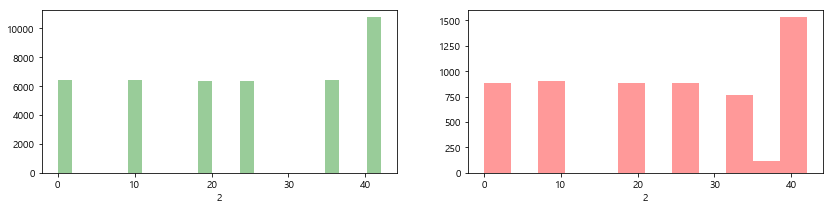

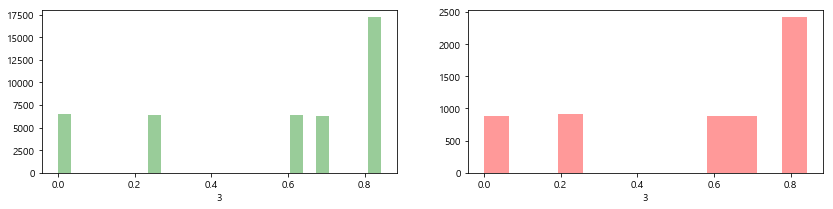

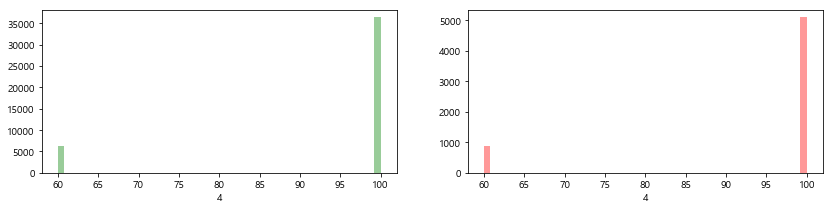

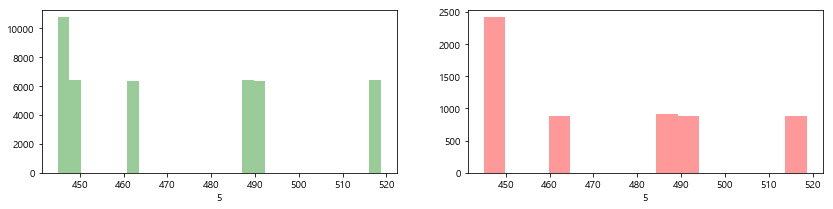

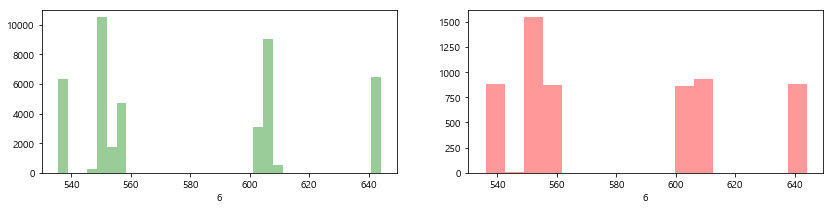

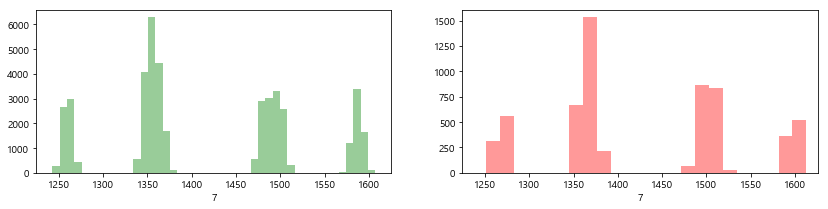

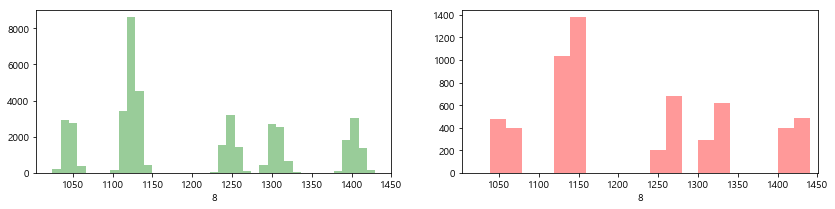

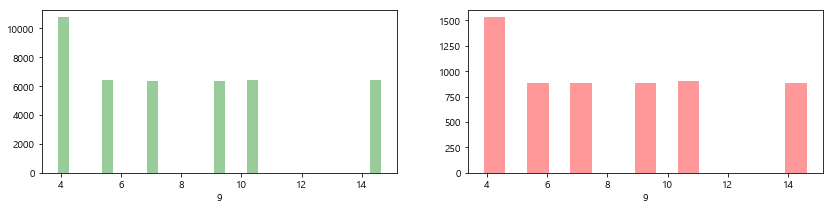

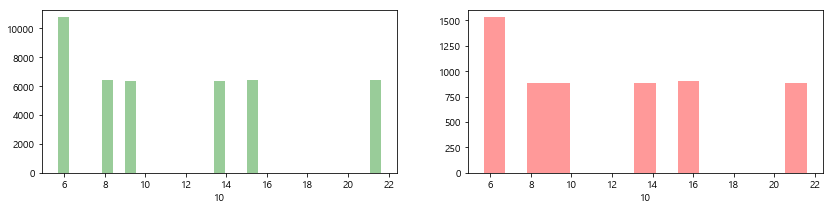

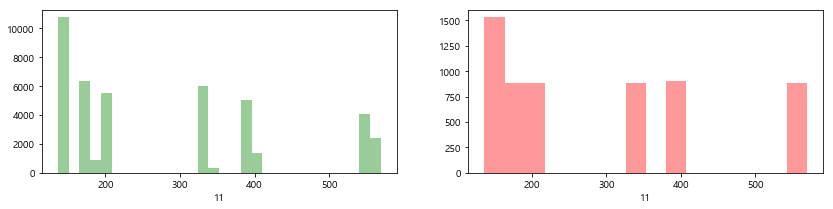

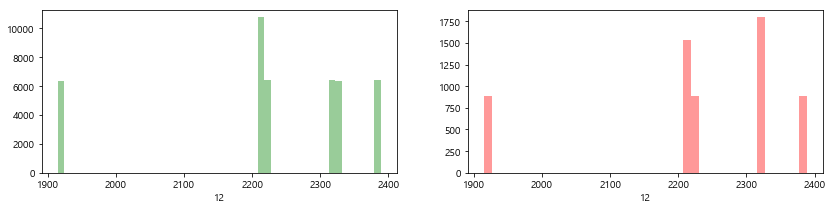

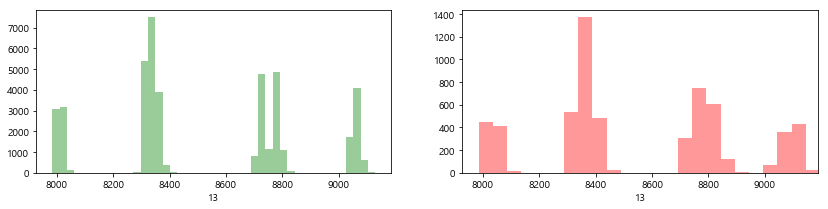

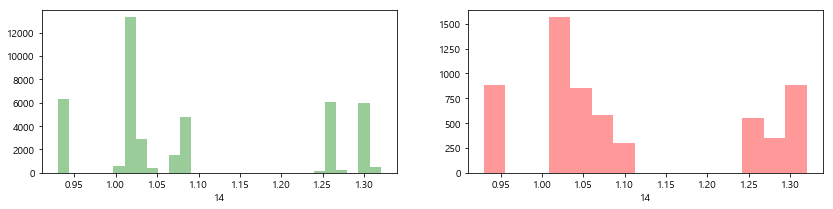

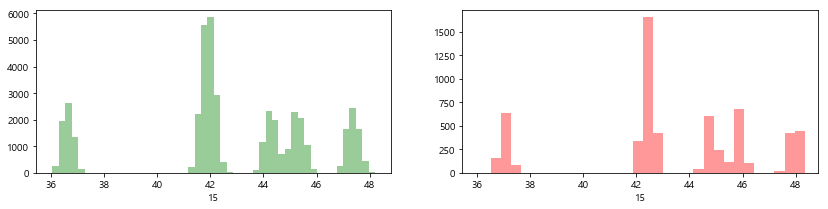

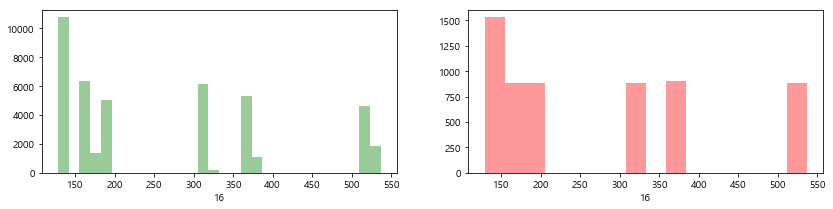

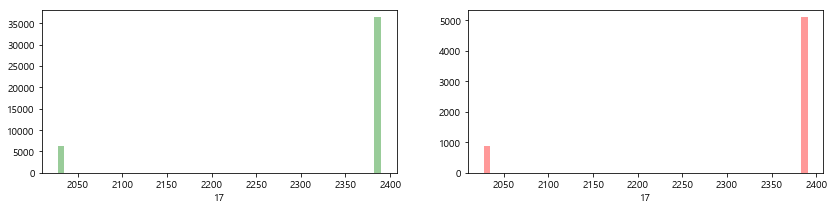

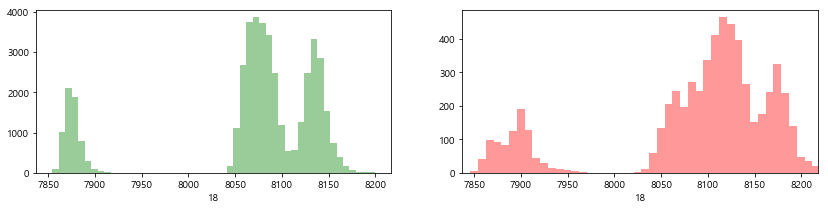

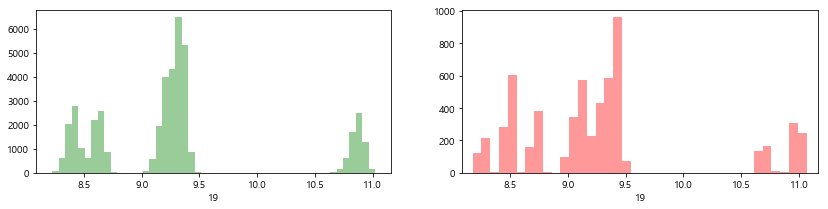

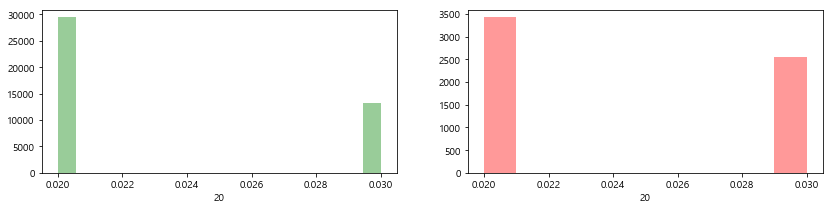

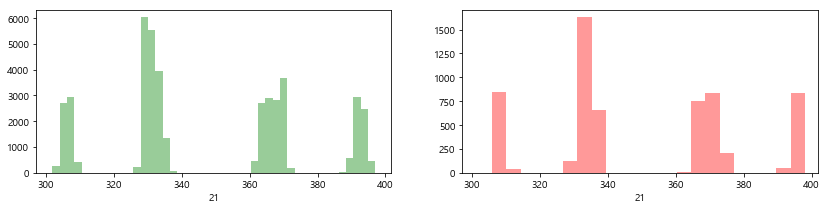

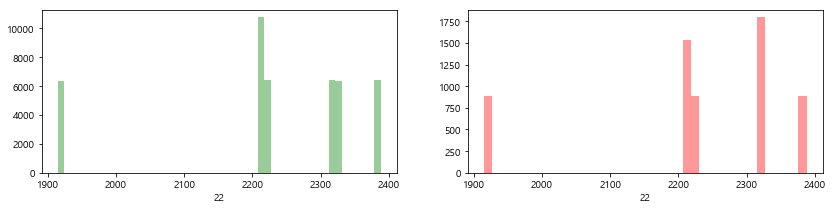

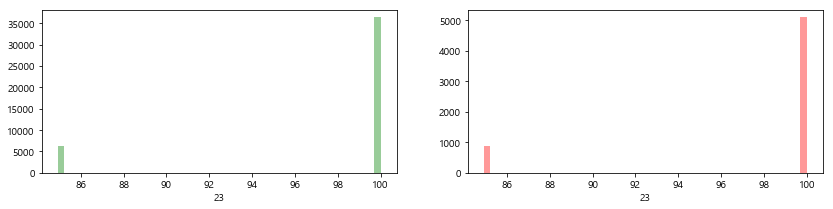

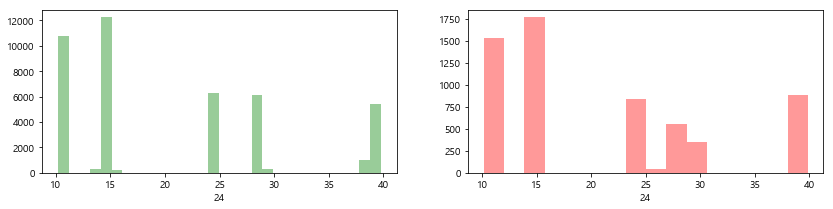

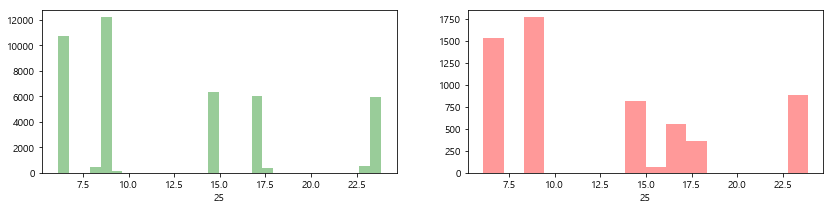

In [47]:
# Train
nomal = nasa_train[nasa_train.label == 0]
fail = nasa_train[nasa_train.label == 1]

# figure, axes = plt.subplots(col_len, 2, figsize=(14, 80))
for i in range(0,col_len):
    figure, axes = plt.subplots(1, 2, figsize=(14, 3))
    nomal_sub = nomal[col_name[i]]
    fail_sub = fail[col_name[i]]
    sns.distplot(nomal_sub,color = 'g',ax=axes[0], kde = False, norm_hist = False)
    sns.distplot(fail_sub,color = 'r',ax=axes[1], kde = False, norm_hist = False)

    hist_min = axes[0].get_xlim()[0]
    hist_max = axes[0].get_xlim()[1]
    axes[1].set_xlim(hist_min,hist_max)   
    
    plt.show()
    #figure.savefig('./result/nasa_EDA2/train_FD001_failure5_'+str(i)+'.png')

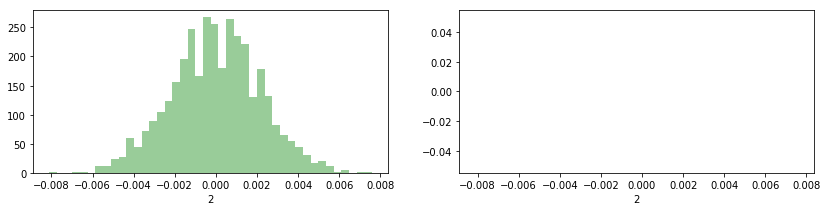

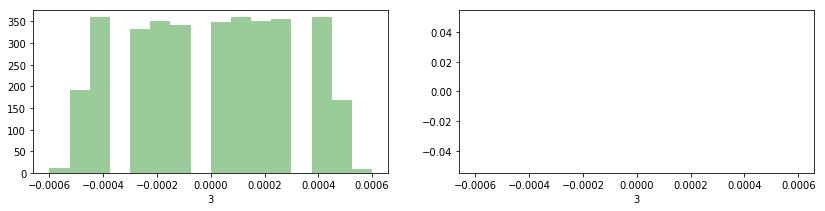

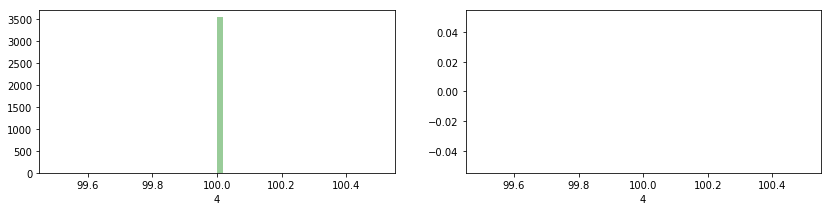

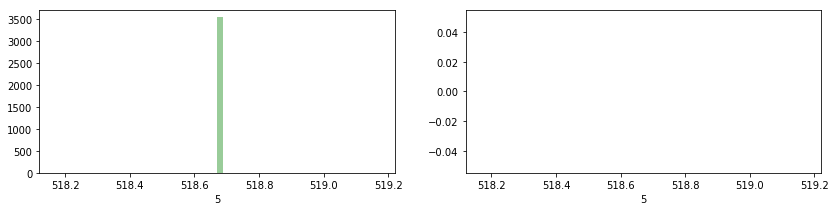

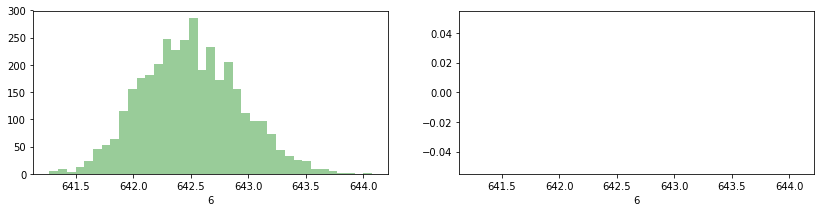

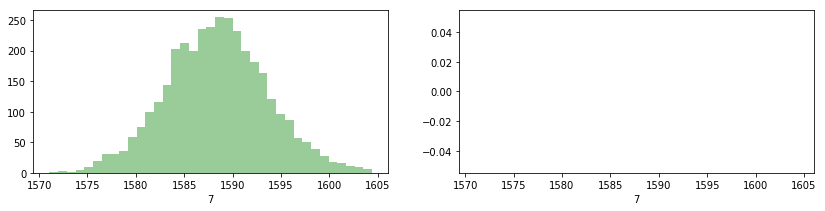

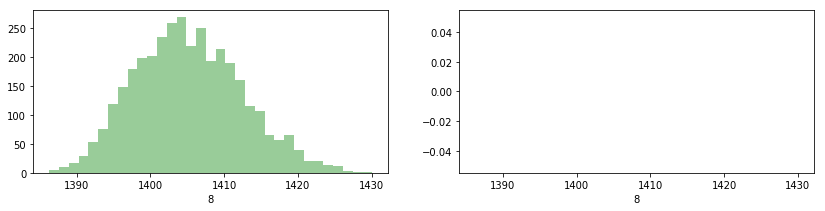

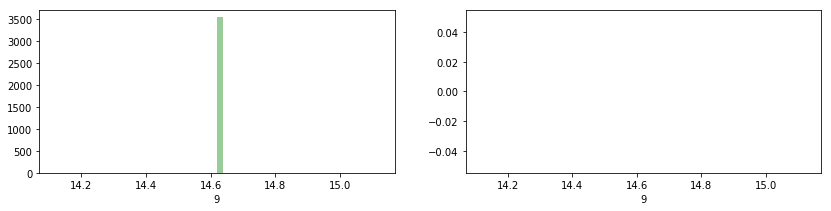

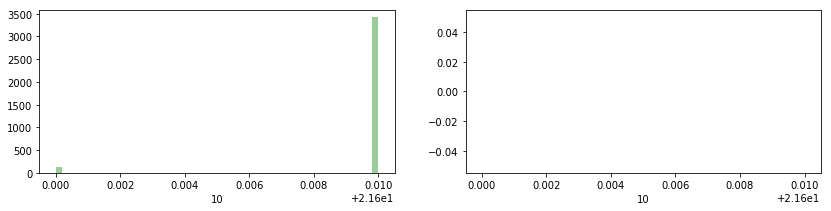

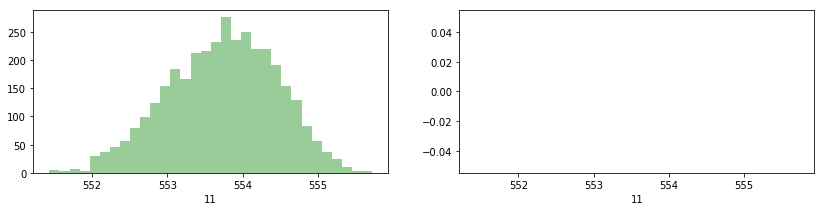

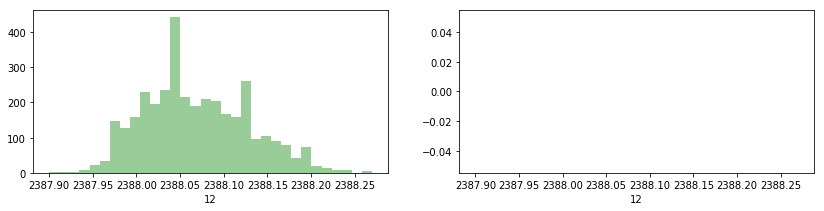

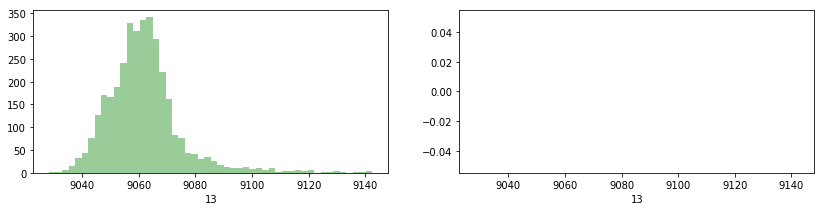

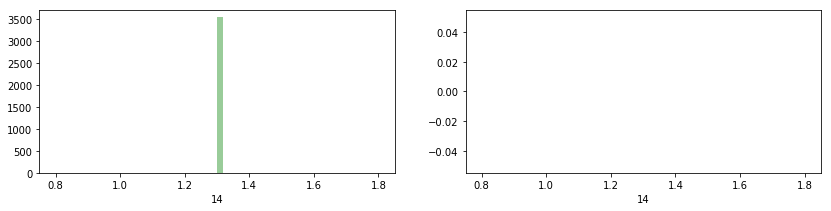

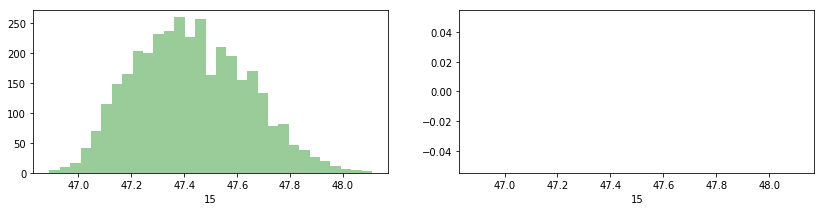

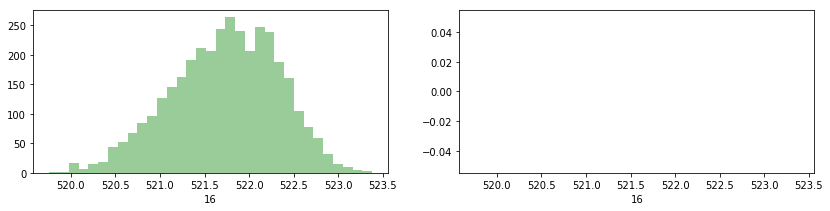

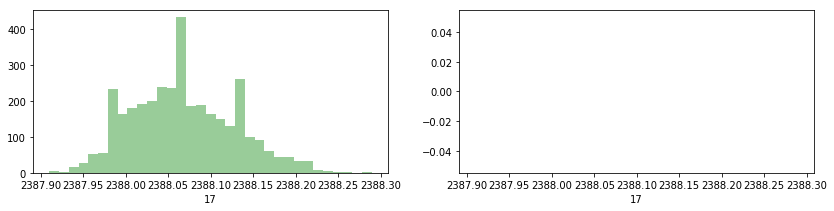

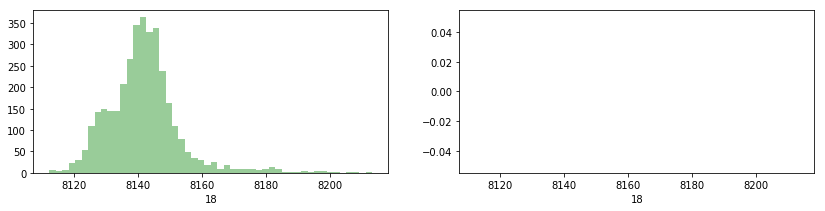

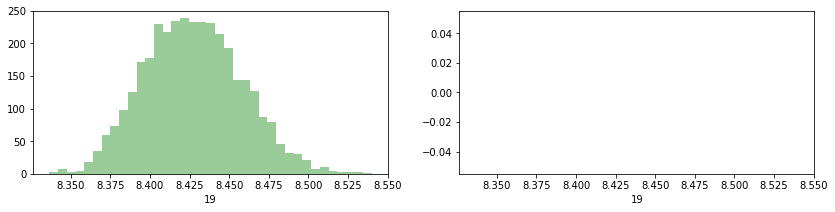

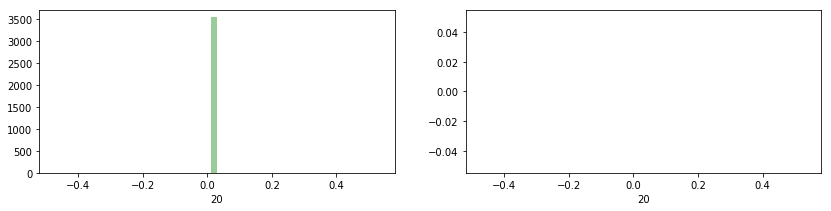

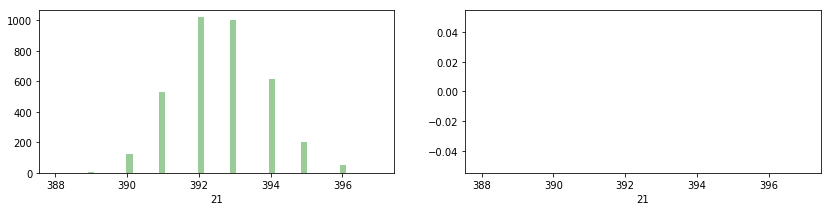

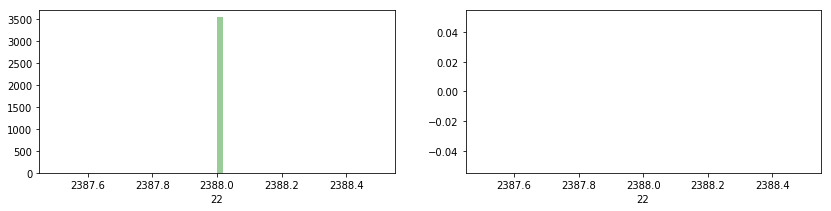

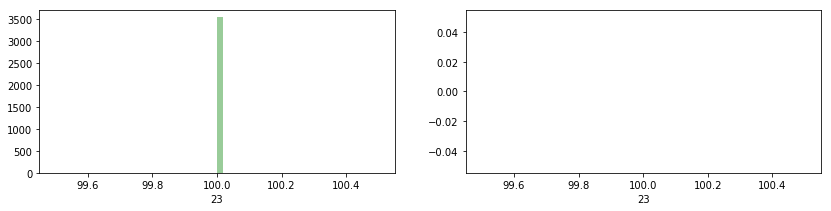

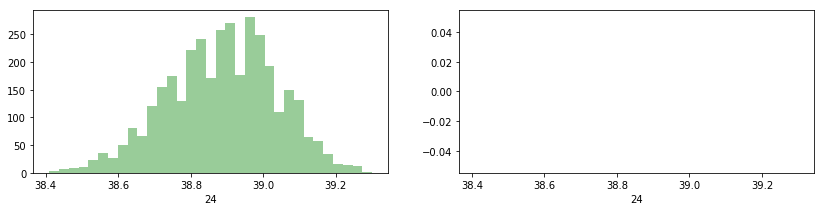

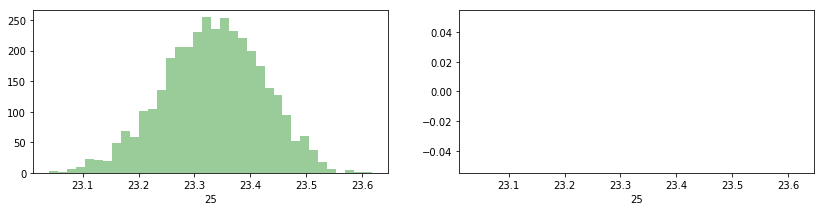

In [26]:
# Test
nomal = nasa_test[nasa_test.label == 0]
fail = nasa_test[nasa_test.label == 1]

# figure, axes = plt.subplots(col_len, 2, figsize=(14, 80))
for i in range(0,col_len):
    figure, axes = plt.subplots(1, 2, figsize=(14, 3))
    nomal_sub = nomal[col_name[i]]
    fail_sub = fail[col_name[i]]
    sns.distplot(nomal_sub,color = 'g',ax=axes[0], kde = False, norm_hist = False)
    sns.distplot(fail_sub,color = 'r',ax=axes[1], kde = False, norm_hist = False)

    hist_min = axes[0].get_xlim()[0]
    hist_max = axes[0].get_xlim()[1]
    axes[1].set_xlim(hist_min,hist_max)  
    
    plt.show()
    #figure.savefig('./result/nasa_EDA2/testFD001_failure5_'+str(i)+'.png')

<function matplotlib.pyplot.show(*args, **kw)>

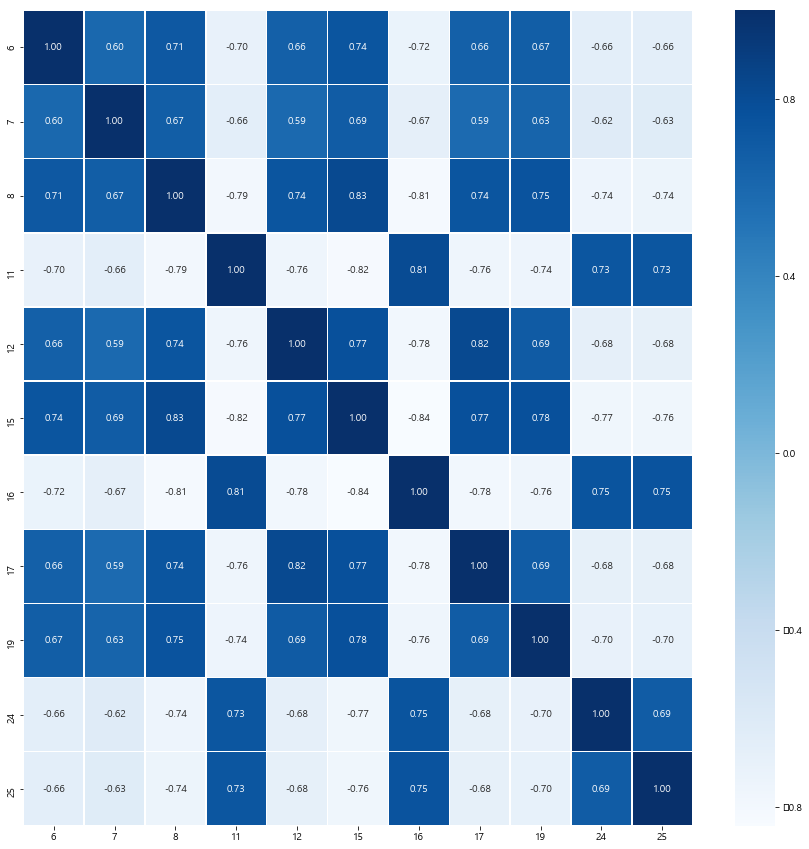

In [27]:
# 상관관계
#-- 한글 폰트 
plt.rc('font', family='Malgun Gothic')

X_cols = ['6','7','8','11','12','15','16','17','19','24','25']

X_data = nasa[X_cols].corr()

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=X_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show
#plt.savefig('C:/Users/JIHYEON/Documents/01.금형/03.python/result/nasa_EDA2/NSAS_corr.png')

<function matplotlib.pyplot.show(*args, **kw)>

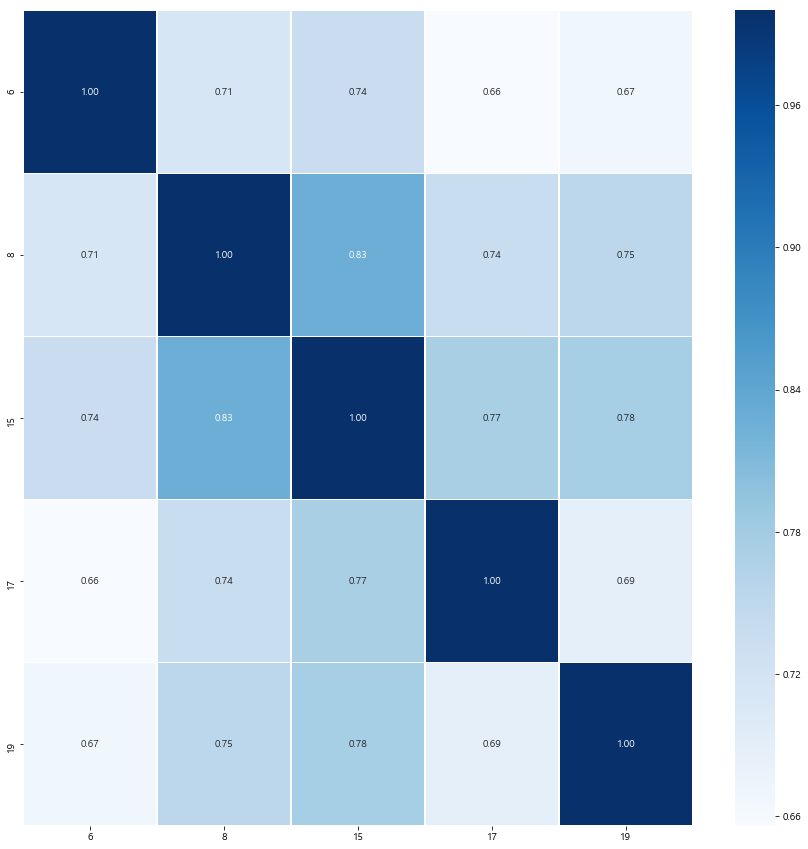

In [28]:
# 상관관계
#-- 한글 폰트 
plt.rc('font', family='Malgun Gothic')

X_cols = ['6','8','15','17','19']
X_data = nasa[X_cols].corr()

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=X_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show
# plt.savefig('C:/Users/JIHYEON/Documents/01.금형/03.python/result/inet_png/INET_corr.png')

<function matplotlib.pyplot.show(*args, **kw)>

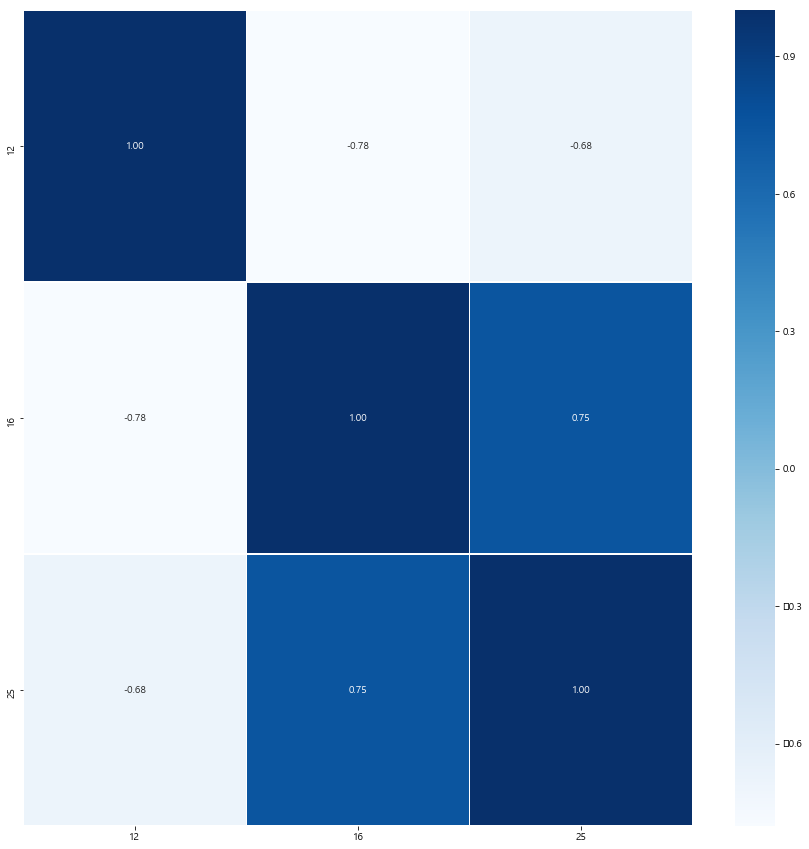

In [29]:
# 상관관계
#-- 한글 폰트 
plt.rc('font', family='Malgun Gothic')

X_cols = ['12','16','25']
X_data = nasa[X_cols].corr()

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=X_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show
# plt.savefig('C:/Users/JIHYEON/Documents/01.금형/03.python/result/inet_png/INET_corr.png')

<function matplotlib.pyplot.show(*args, **kw)>

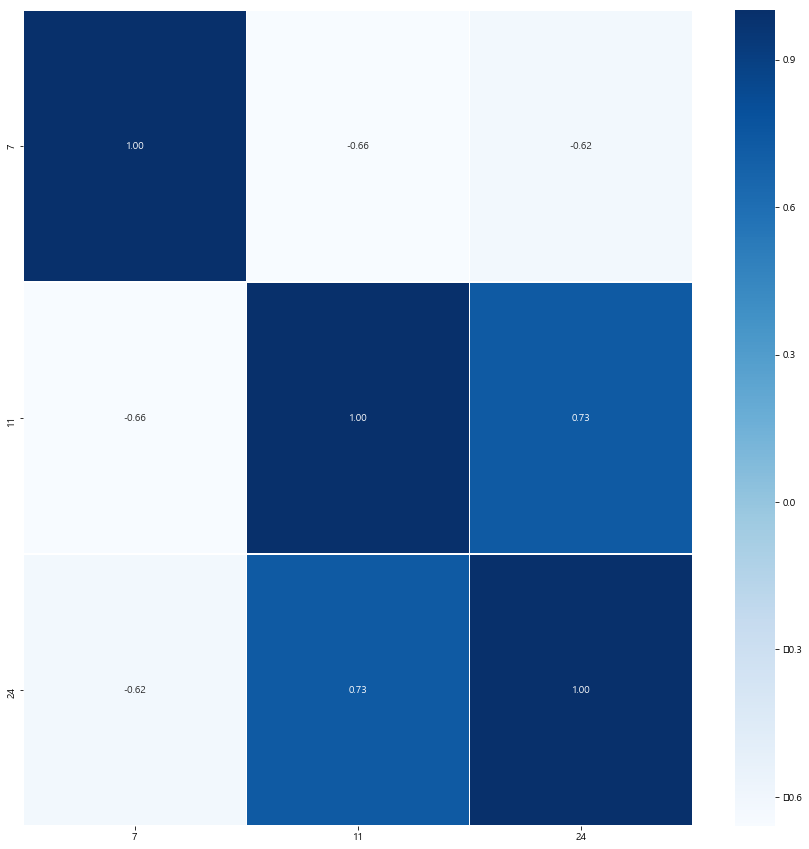

In [30]:
# 상관관계
#-- 한글 폰트 
plt.rc('font', family='Malgun Gothic')

X_cols = ['7','11','24']
X_data = nasa[X_cols].corr()

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=X_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show
# plt.savefig('C:/Users/JIHYEON/Documents/01.금형/03.python/result/inet_png/INET_corr.png')

<function matplotlib.pyplot.show(*args, **kw)>

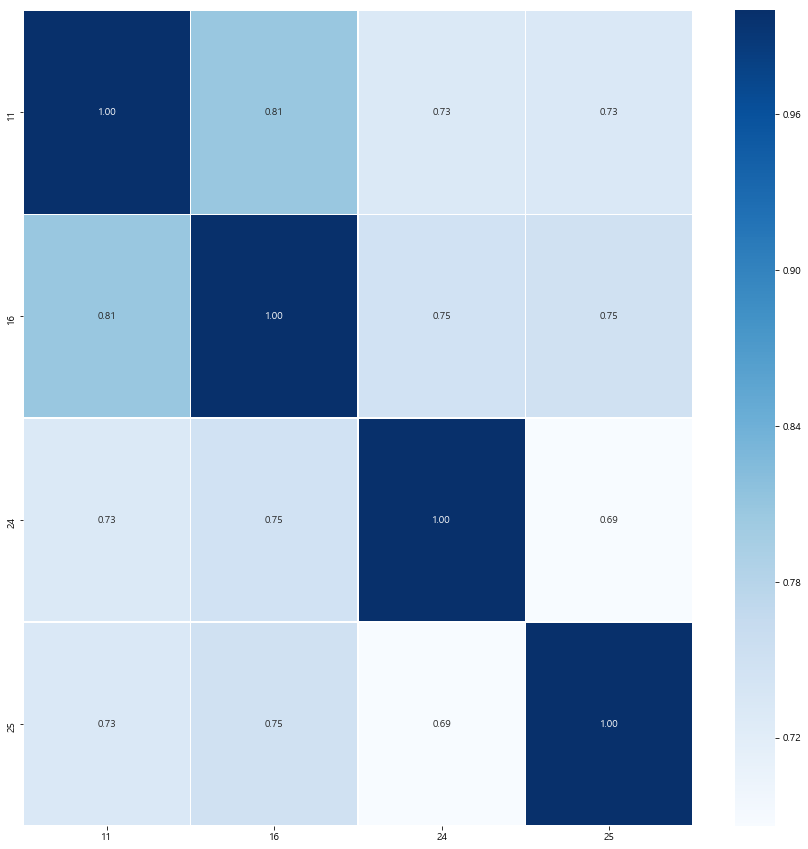

In [31]:
# 상관관계
#-- 한글 폰트 
plt.rc('font', family='Malgun Gothic')

X_cols = ['11','16','24','25']
X_data = nasa[X_cols].corr()

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=X_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show
# plt.savefig('C:/Users/JIHYEON/Documents/01.금형/03.python/result/inet_png/INET_corr.png')

<function matplotlib.pyplot.show(*args, **kw)>

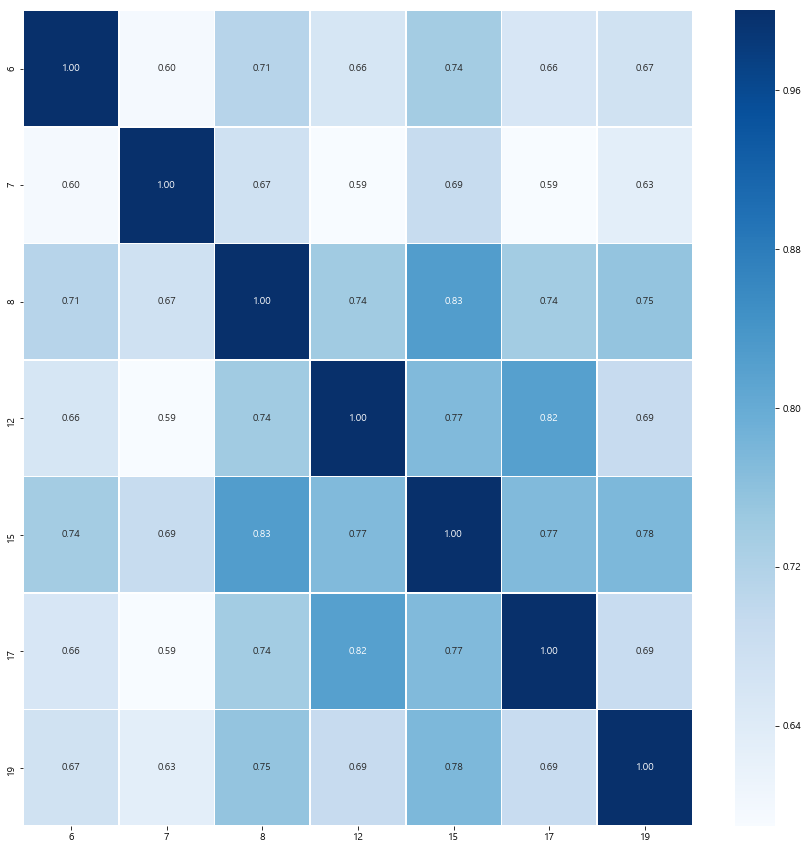

In [32]:
# 상관관계
#-- 한글 폰트 
plt.rc('font', family='Malgun Gothic')

X_cols = ['6','7','8','12','15','17','19']
X_data = nasa[X_cols].corr()

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=X_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show
# plt.savefig('C:/Users/JIHYEON/Documents/01.금형/03.python/result/inet_png/INET_corr.png')

##### 컬럼별 시간별 추세선 그리기

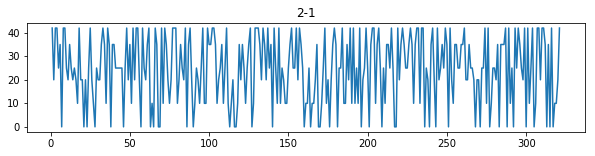

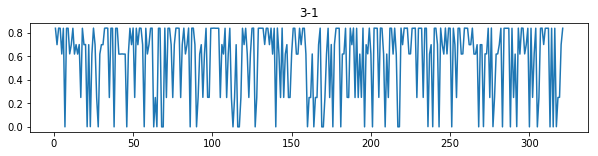

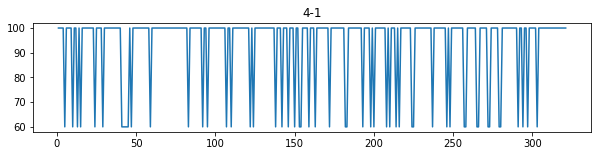

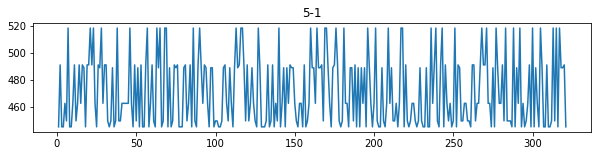

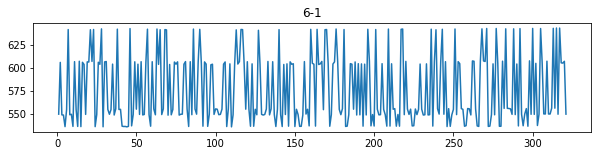

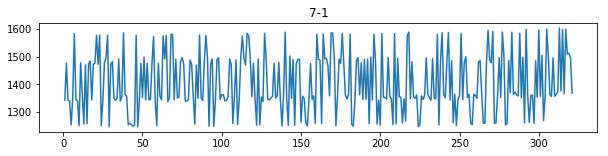

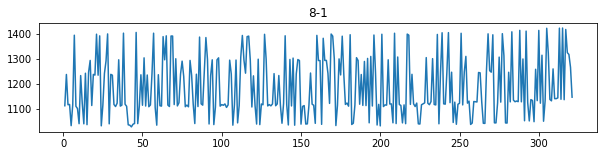

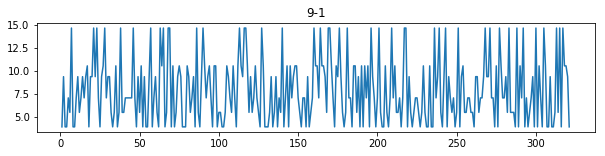

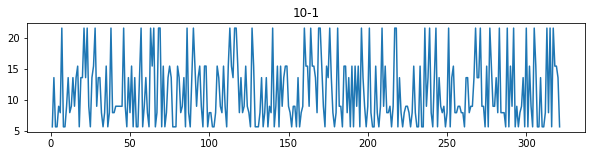

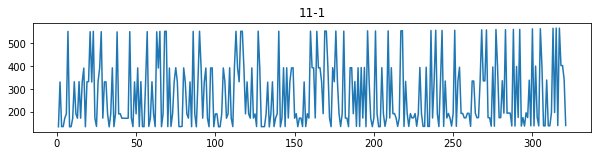

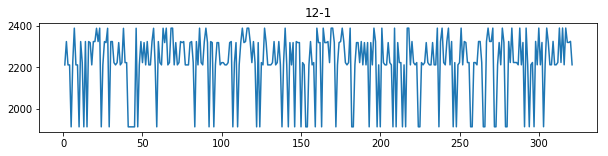

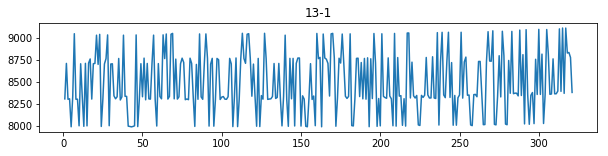

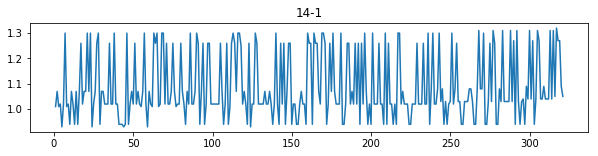

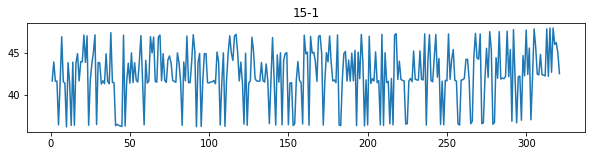

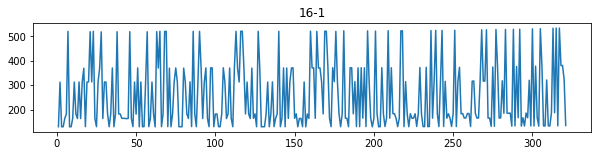

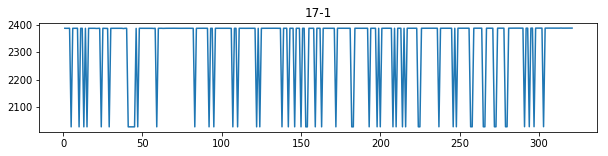

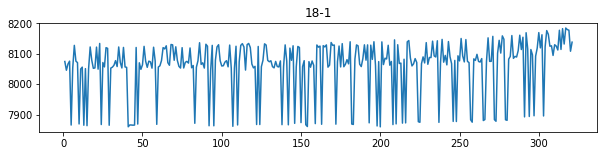

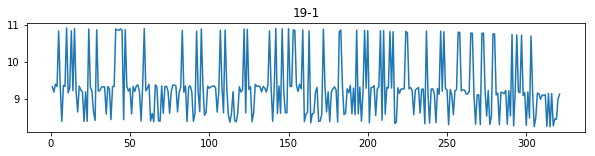

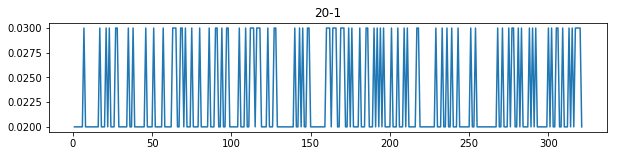

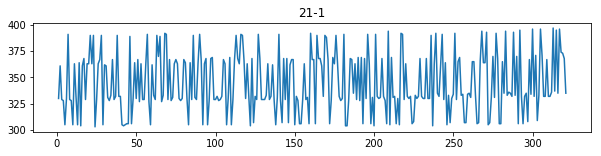

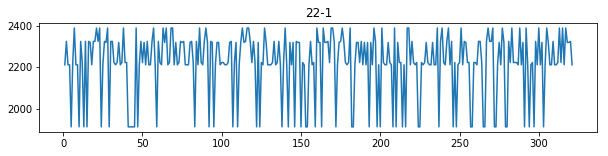

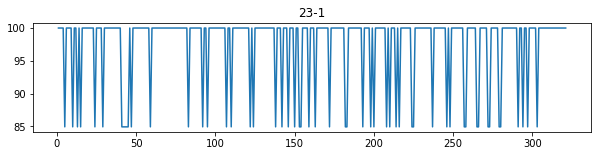

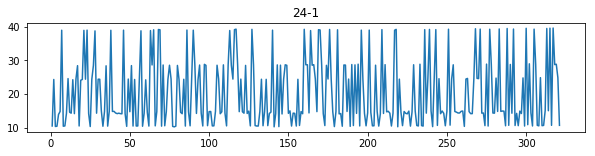

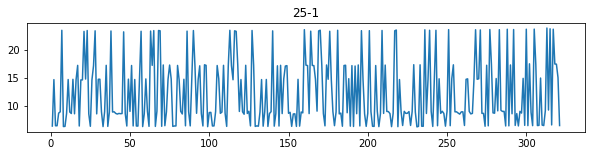

In [5]:
cycle_numbers = nasa['0'].unique().tolist()
for col in col_name : 
    cycle_num = 1
    cycle_data = nasa[nasa['0'] == cycle_num]
    plot_title = col+'-'+str(cycle_num)

    time = cycle_data['1']
    value = cycle_data[col]
    
    plt.figure(figsize=(10,2))
    plt.plot(time,value)
    plt.title(plot_title)
#     plt.savefig('./result/nasa_EDA2/timeseries_'+plot_title+'.png')
    plt.show()